<a href="https://colab.research.google.com/github/mohammedxo303/DenverResidential/blob/main/DenmetroData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
plt.style.use('ggplot')
#pd.set.option('max_columns', 200)


df = pd.read_csv("Zip_zori_uc_sfrcondomfr_sm_month.csv")
df.head(15)
df.columns

df_co = df[df['State'] == 'CO']
df_co['RegionName'].unique()[:30]

df_co['RegionName'] = df_co['RegionName'].astype(str)

# List of validated Denver Metro ZIPs
denver_zips = [
    '80202','80203','80204','80205','80206',
    '80209','80246','80231',
    '80120','80121','80122','80123','80465',
    '80126','80129','80130','80163','80124','80104','80108','80109',
    '80015','80016','80111','80112','80134','80138',
    '80022','80216','80603','80011','80012','80013','80014','80010','80017','80045',
    '80214','80215','80226','80228','80232','80401','80402','80403','80419','80439',
    '80001','80002','80003','80004','80005','80006','80007',
    '80027','80020','80021','80023',
    '80241','80221','80229','80233','80260',
    '80601','80602'
]

# Filter to just Denver metro

df_denver = df_co[df_co['RegionName'].isin(denver_zips)].copy()
print("Unique ZIPs:", df_denver['RegionName'].nunique())


# Data cleaning
df_denver.isna().sum().sort_values(ascending=False).head()

df_denver.ffill(axis=1)


df_denver['RegionName'] = df_denver['RegionName'].str.strip()

#Zoning

zone_mapping = {
    # Central (Downtown)
    'Central':    ['80203','80204','80202','80205','80206'],

    # South
    'CherryCreek-DTC':           ['80206','80209','80231','80246', '80111', '80112'],
    'Littleton-Morrison':        ['80120','80121','80122','80123','80465'],
    'HR-LoneTree-CastleRock':    ['80126','80129','80130','80163','80124','80104','80108','80109'],
    'Centennial-SAurora-Parker': ['80015','80016','80111','80112','80121','80122','80134','80138'],

    # East
    'Commerce-Brighton-Globeville': ['80022','80216','80603','80601','80602'],
    'Aurora-DIA-NewDev':         ['80011','80012','80013','80015','80016'],
    'Aurora-West-NorthQuincy':   ['80014','80010','80017','80045'],

    # West
    'Lakewood-Golden':           ['80214','80215','80226','80228','80232','80401','80402','80403','80419','80439'],
    'Arvada':                    ['80001','80002','80003','80004','80005','80006','80007'],

    # North
    'Louisville-Westminster-Broomfield': ['80027','80003','80005','80020','80021','80023'],
    'Thornton-Main':           ['80241','80221','80229','80233','80260'],
}

def assign_zone(zip_code):
  for zone, zips in zone_mapping.items():
    if zip_code in zips:
      return zone
  return None

df_denver['Zone'] = df_denver['RegionName'].map(assign_zone)


id_vars = ['RegionName', 'State', 'Metro', 'CountyName', 'SizeRank', 'Zone']
value_vars = [col for col in df_denver.columns if '-' in col]
df_melted = df_denver.melt(
      id_vars=id_vars,
      value_vars=value_vars,
      var_name='Date',
      value_name='Rent'
      )
df_melted['Date'] = pd.to_datetime(df_melted['Date'])
df_melted.sort_values(by=['RegionName', 'Date'], inplace=True)

print(df_melted.shape)
df_melted.head(100)

# Getting nulls down to a minimum


value_vars = [col for col in df_denver.columns if '-' in col]

threshold = int(0.3 * len(value_vars))

df_denver = df_denver[df_denver[value_vars].ffill(axis=1).isna().sum(axis=1) < threshold]

df_denver.loc[:, value_vars] = df_denver[value_vars].ffill(axis=1)

df_denver[value_vars].isna().mean().mean()

Unique ZIPs: 59
(7316, 8)


<ipython-input-9-3736097528>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co['RegionName'] = df_co['RegionName'].astype(str)


np.float64(0.18026565464895636)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')


df = pd.read_csv("Zip_zori_uc_sfrcondomfr_sm_month.csv")

df_co = df[df['State'] == 'CO'].copy()
df_co['RegionName'] = df_co['RegionName'].astype(str).str.strip()

# Verified Metro Zips

denver_zips =  [
    '80202','80203','80204','80205','80206',
    '80209','80246','80231',
    '80120','80121','80122','80123','80465',
    '80126','80129','80130','80163','80124','80104','80108','80109',
    '80015','80016','80111','80112','80134','80138',
    '80022','80216','80603','80011','80012','80013','80014','80010','80017','80045',
    '80214','80215','80226','80228','80232','80401','80402','80403','80419','80439',
    '80001','80002','80003','80004','80005','80006','80007',
    '80027','80020','80021','80023',
    '80241','80221','80229','80233','80260',
    '80601','80602'
]
df_denver = df_co[df_co['RegionName'].isin(denver_zips)].copy()


#Zoning

zone_mapping = {
    # Central (Downtown)
    'Central':    ['80203','80204','80202','80205','80206'],

    # South
    'CherryCreek-DTC':           ['80206','80209','80231','80237', '80111',],
    'Littleton-Morrison':        ['80120','80121','80122','80123','80465'],
    'HR-LoneTree-CastleRock':    ['80126','80129','80130','80163','80124','80104','80108','80109'],
    'Centennial-SAurora-Parker': ['80015','80016','80111','80112','80121','80122','80134','80138'],

    # East
    'Commerce-Brighton-Globeville': ['80216','80603','80601','80602'],
    'Aurora-DIA-NewDev':         ['80011','80012','80013','80015','80016'],
    'Aurora-West-NorthQuincy':   ['80014','80010','80017','80045'],

    # West
    'Lakewood-Golden':           ['80214','80215','80226','80228','80232','80401','80402','80403','80419','80439'],
    'Arvada':                    ['80001','80002','80003','80004','80005','80006','80007'],

    # North
    'Louisville-Westminster-Broomfield': ['80027','80003','80005','80020','80021','80023'],
    'Thornton-Main':           ['80241','80221','80229','80233','80260'],
}

def assign_zone(zip_code):
  for zone, zips in zone_mapping.items():
    if zip_code in zips:
      return zone
  return None

df_denver['Zone'] = df_denver['RegionName'].map(assign_zone)

# Forward Fill

value_vars = [col for col in df_denver.columns if '-' in col]
threshold = int(0.3 * len(value_vars))

df_denver = df_denver[df_denver[value_vars].ffill(axis=1).isna().sum(axis=1) < threshold]
df_denver.loc[:, value_vars] = df_denver[value_vars].ffill(axis=1)

# Reshaping

id_vars = ['RegionName', 'State', 'Metro', 'CountyName', 'SizeRank', 'Zone']
df_melted = df_denver.melt(
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='Date',
    value_name='Rent'
)
df_melted['Date'] = pd.to_datetime(df_melted['Date'])
df_melted.sort_values(by=['RegionName', 'Date'], inplace=True)







<ipython-input-11-1097858290>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


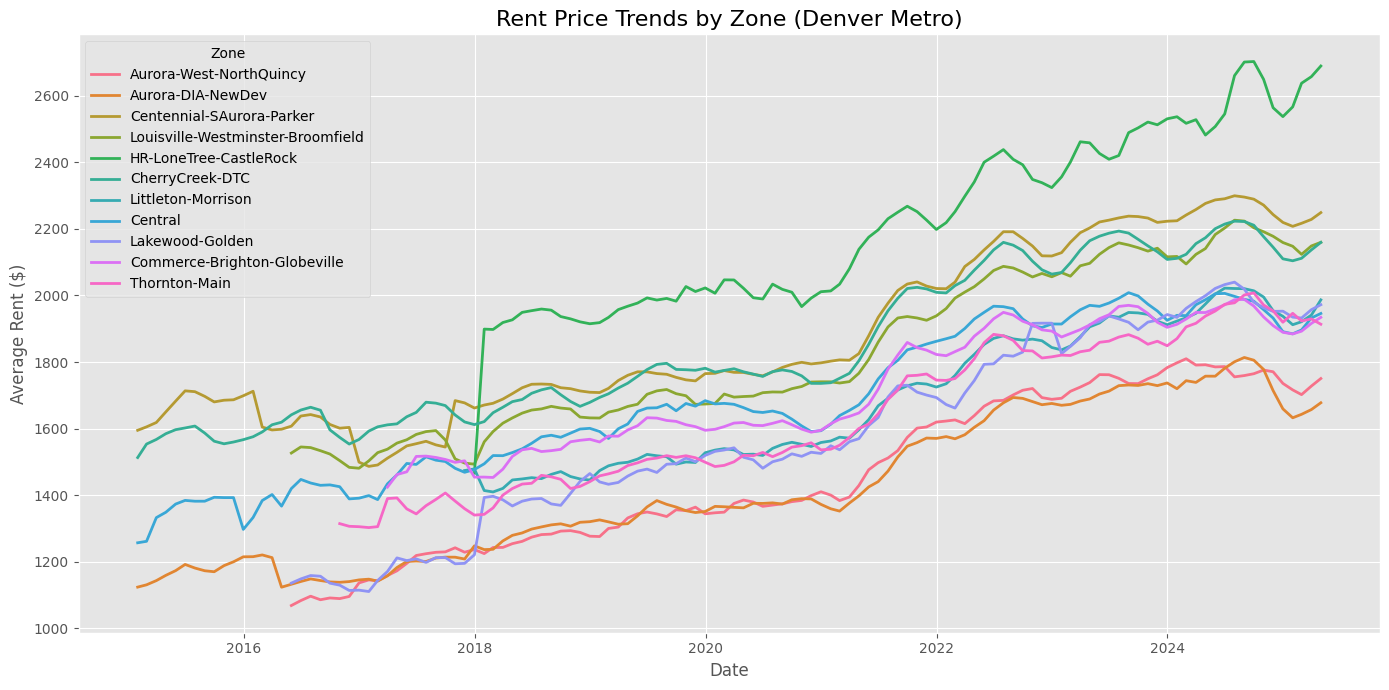

In [11]:
df_melted.head(150)

plt.figure(figsize=(14,7))

sns.lineplot(
    data=df_melted,
    x='Date',
    y='Rent',
    hue='Zone',
    estimator='median',
    ci=None,
    lw= 2
)

plt.title('Rent Price Trends by Zone (Denver Metro)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Rent ($)', fontsize=12)

plt.tight_layout()
plt.show()

In [20]:
df_melted[df_melted['RegionName'].isin( ['80022','80216','80603','80601','80602'],)].groupby('RegionName')['Rent'].mean()


,Rent
RegionName,
80022,2320.602886
80216,1722.506776
80601,1755.233822


In [27]:
# Home value data extraction and merging for ROI calculation


df_price = pd.read_csv("Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

df_price = df_price[df_price['State'] == 'CO'].copy()
df_price['RegionName'] = df_price['RegionName'].astype(str).str.strip()
df_price = df_price[df_price['RegionName'].isin(denver_zips)].copy()
df_price['Zone'] = df_price['RegionName'].map(assign_zone)



value_vars_price = [col for col in df_price.columns if '-' in col]
df_price_melted = df_price.melt(
    id_vars=['RegionName', 'State', 'Metro', 'CountyName', 'SizeRank', 'Zone'],
    value_vars=value_vars_price,
    var_name='Date',
    value_name='Price'
)
df_price_melted['Date'] = pd.to_datetime(df_price_melted['Date'])

df_price_melted = df_price_melted[df_price_melted['Date'] >= '2015-01-01']

# Ensuring identical formatting for merge

df_melted['RegionName'] = df_melted['RegionName'].astype(str).str.strip()
df_price_melted['RegionName'] = df_price_melted['RegionName'].astype(str).str.strip()

df_melted['Date'] = pd.to_datetime(df_melted['Date'])
df_price_melted['Date'] = pd.to_datetime(df_price_melted['Date'])

# Purging nulls for clean comparison
df_return = df_return.dropna(subset=['Rent', 'Price'])

# Merging

df_return = pd.merge(df_melted, df_price_melted, on=['RegionName', 'Date', 'Zone'], how='inner')

df_return.dropna(subset=['Rent', 'Price'], inplace=True)

print(df_return[['RegionName', 'Date','Rent', 'Price', 'Zone' ]])




     RegionName       Date         Rent          Price
16        80010 2016-05-31   983.021999  230981.200523
17        80010 2016-06-30  1015.026923  234390.527808
18        80010 2016-07-31  1041.441960  237564.147825
19        80010 2016-08-31  1020.685422  240407.241361
20        80010 2016-09-30  1018.230199  243013.952674
...         ...        ...          ...            ...
4087      80601 2024-12-31  2006.246864  519442.674624
4088      80601 2025-01-31  2003.431867  519304.890824
4089      80601 2025-02-28  1998.795882  518112.280692
4090      80601 2025-03-31  2030.628608  515808.093139
4091      80601 2025-04-30  2047.275362  513371.191790

[3368 rows x 4 columns]
     RegionName       Date         Rent          Price  \
16        80010 2016-05-31   983.021999  230981.200523   
17        80010 2016-06-30  1015.026923  234390.527808   
18        80010 2016-07-31  1041.441960  237564.147825   
19        80010 2016-08-31  1020.685422  240407.241361   
20        80010 2016-09-3

In [28]:


df_return['OwnerExpense'] = (
    0.006 * df_return['Price'] / 12 +   # Taxes
    0.01 * df_return['Price'] / 12 +   # Maintenance
    150 +                              # Insurance
    200 +                              # HOA/Utilities
    0.05 * df_return['Rent']           # Vacancy
)

df_return['ROI'] = ((df_return['Rent'] - df_return['OwnerExpense']) / df_return['Price']) * 12




<ipython-input-31-301159741>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_by_zone.values, y=roi_by_zone.index, palette="viridis")


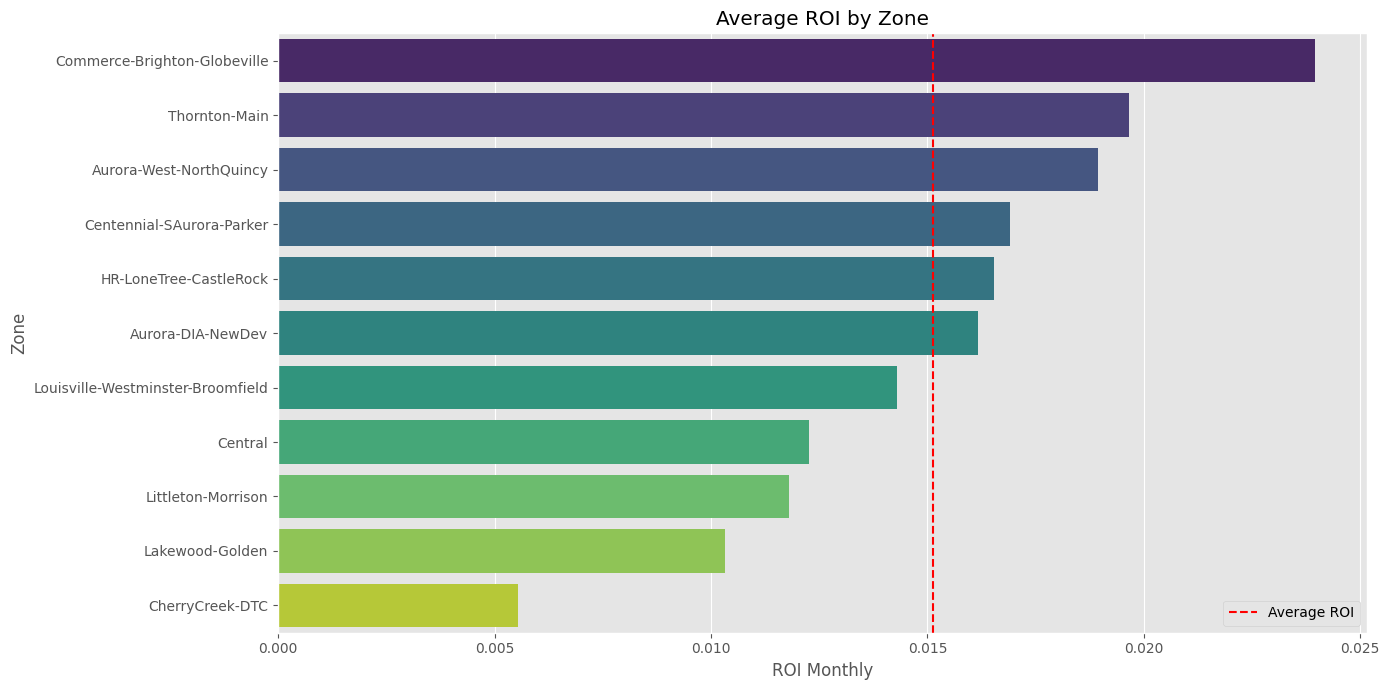

In [31]:

# Average ROI by zone
roi_by_zone = df_return.groupby('Zone')['ROI'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14,7))
sns.barplot(x=roi_by_zone.values, y=roi_by_zone.index, palette="viridis")
plt.axvline(roi_by_zone.mean(), color='red', linestyle='--', label='Average ROI')
plt.title("Average ROI by Zone")
plt.xlabel("ROI Monthly")
plt.ylabel("Zone")
plt.legend()
plt.tight_layout()
plt.show()
